In [1]:
#---------------------------------------------------------Insurance Fraud Detection-------------------------------------------------------------------

In [2]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [3]:
df = pd.read_csv("C:/Users/91801/Desktop/Insurance Project/dataset/fraud_dataset.csv")
df.head()

,Claim_ID,Claim_Date,Policyholder_ID,Claim_Amount,Claim_Type,Suspicious_Flags,Fraud_Label
0,C00001,13-04-2023,P00001,10711.01,Vehicle,False,0
1,C00002,15-12-2023,P00002,11528.26,Vehicle,True,1
2,C00003,28-09-2023,P00003,14106.24,Vehicle,False,0
3,C00004,17-04-2023,P00004,13242.61,Vehicle,False,0
4,C00005,13-03-2023,P00005,9133.98,Medical,False,0


In [4]:
# change columns to lowercase
df.columns = df.columns.str.lower()

In [5]:
df["suspicious_flags"] = df["suspicious_flags"].astype(int)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   claim_id          100000 non-null  object 
 1   claim_date        100000 non-null  object 
 2   policyholder_id   100000 non-null  object 
 3   claim_amount      100000 non-null  float64
 4   claim_type        100000 non-null  object 
 5   suspicious_flags  100000 non-null  int32  
 6   fraud_label       100000 non-null  int64  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 5.0+ MB


In [7]:
df.describe()

,claim_amount,suspicious_flags,fraud_label
count,100000.000000,100000.00000,100000.000000
mean,12814.151447,0.15177,0.148360
std,5158.758713,0.35880,0.355458
min,500.000000,0.00000,0.000000
25%,9159.890000,0.00000,0.000000
50%,11947.685000,0.00000,0.000000
75%,15230.517500,0.00000,0.000000
max,38707.650000,1.00000,1.000000


In [8]:
df.describe(include="object")

,claim_id,claim_date,policyholder_id,claim_type
count,100000,100000,100000,100000
unique,100000,365,100000,3
top,C00001,26-05-2023,P00001,Vehicle
freq,1,319,1,60049


<Axes: xlabel='claim_amount', ylabel='Count'>

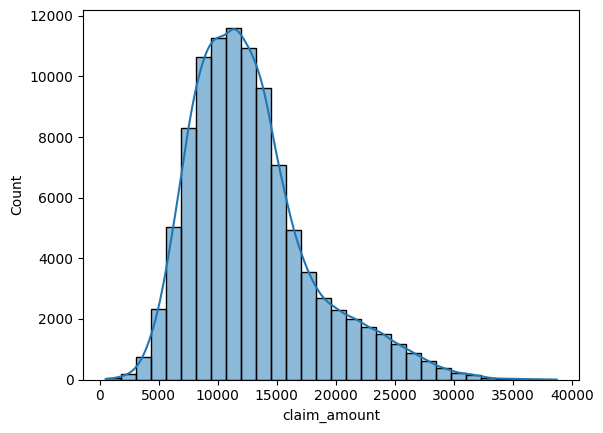

In [9]:
#----------------------------------------------------------Eda(Exploratory Data Analysis)-----------------------------------------------------------

sns.histplot(df["claim_amount"], bins=30, kde=True)

<Axes: xlabel='claim_type', ylabel='count'>

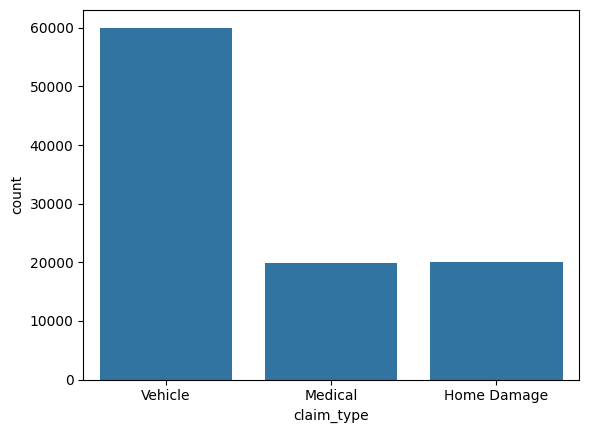

In [10]:
sns.countplot(x=df["claim_type"])

<Axes: xlabel='suspicious_flags', ylabel='count'>

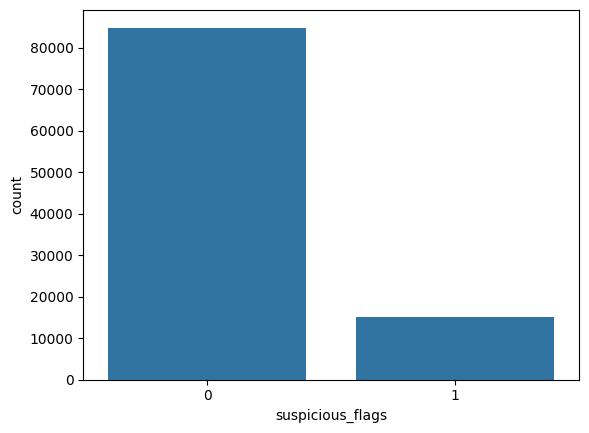

In [11]:
sns.countplot(x=df["suspicious_flags"])

<Axes: xlabel='fraud_label', ylabel='Count'>

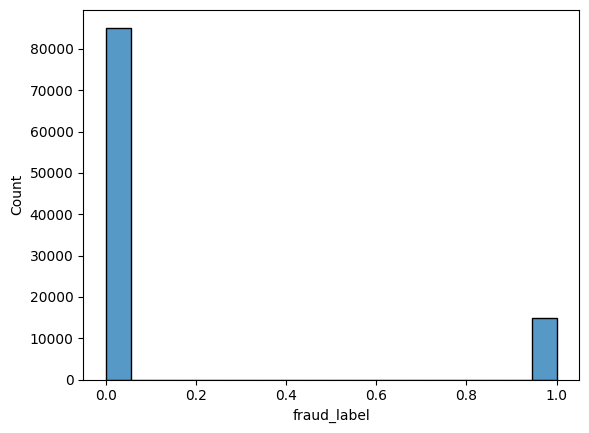

In [12]:
sns.histplot(df["fraud_label"])

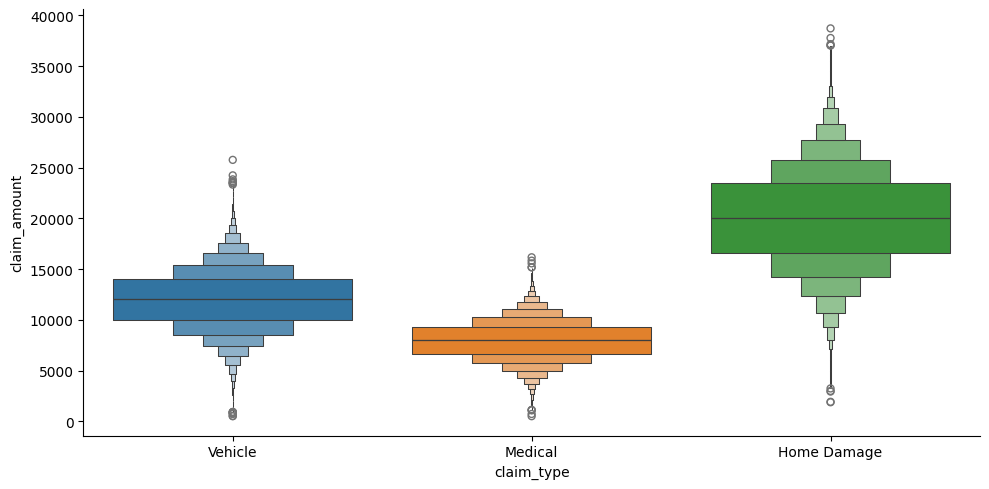

In [13]:
sns.catplot(data=df, x="claim_type", y="claim_amount", hue="claim_type", kind="boxen", aspect=2)

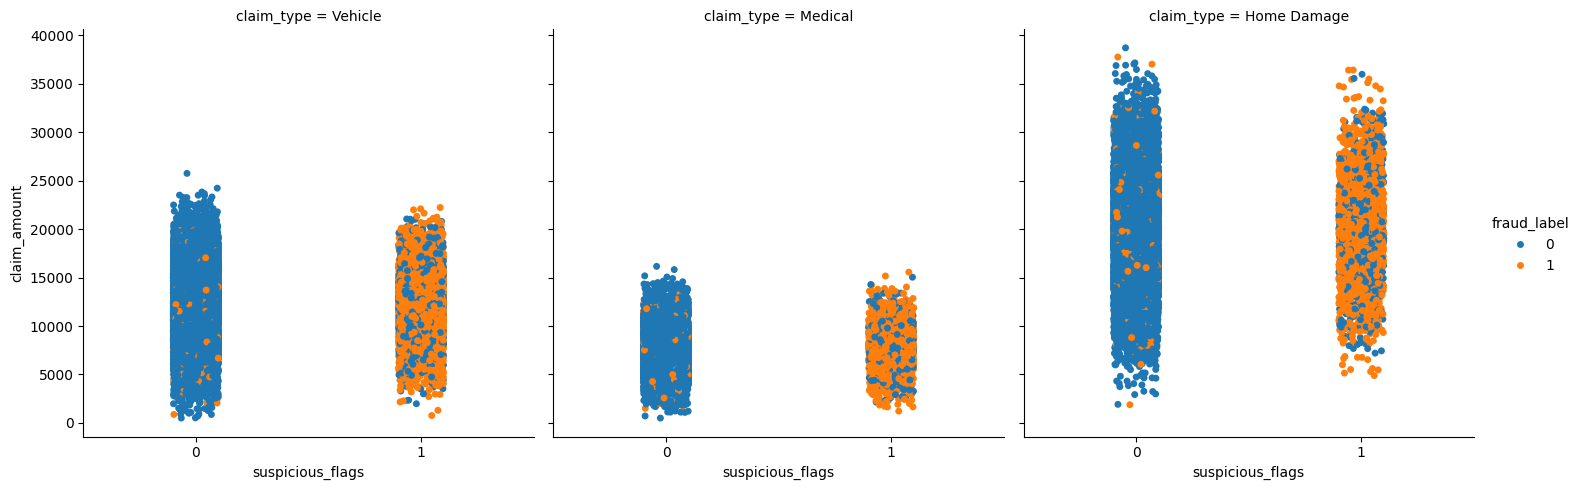

In [14]:
sns.catplot(data=df, x="suspicious_flags", y="claim_amount", hue="fraud_label", col="claim_type")

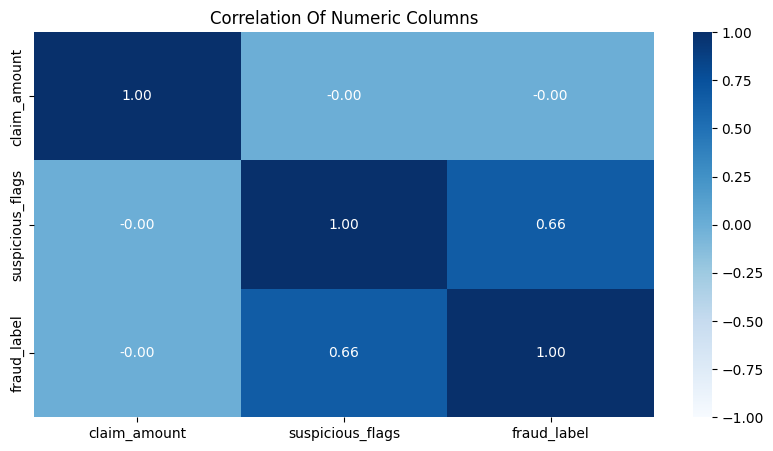

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, fmt=".2f", cmap="Blues", vmin=-1, vmax=1)
plt.title("Correlation Of Numeric Columns")
plt.show()

In [16]:
# one_hot_encoding
one_hot_encode = pd.get_dummies(df["claim_type"], prefix="claim_type", drop_first=True).astype(int)
df.drop("claim_type", axis=1, inplace=True)
feature = pd.concat([df, one_hot_encode], axis=1)

In [17]:
# select the feature
x = feature.drop(columns=["claim_id", "claim_date", "policyholder_id", "fraud_label"])
y = feature["fraud_label"]

In [18]:
# over samplt the minority class
smote = SMOTE()
x_res, y_res = smote.fit_resample(x,y)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, stratify=y_res, random_state=42)

In [20]:
# feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
model = RandomForestClassifier()

In [22]:
model.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [23]:
y_pred = model.predict(x_test_scaled)

In [24]:
# evaluate the model using metrics
print(f"accuracy score : {accuracy_score(y_test,y_pred):.2f}")
print(f"precision score : {precision_score(y_test,y_pred):.2f}")
print(f"recall score : {recall_score(y_test,y_pred):.2f}")
print(f"f1 score : {f1_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

accuracy score : 0.79
precision score : 0.78
recall score : 0.80
f1 score : 0.79
              precision    recall  f1-score   support

           0       0.80      0.78      0.79     17033
           1       0.78      0.80      0.79     17033

    accuracy                           0.79     34066
   macro avg       0.79      0.79      0.79     34066
weighted avg       0.79      0.79      0.79     34066



In [25]:
x_small, _, y_small, _ = train_test_split(x_train_scaled, y_train, train_size=20000, stratify=y_train, random_state=42)

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 3, 5],
    "min_samples_leaf": [1, 2]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, n_jobs=-1, verbose=1)
grid.fit(x_small, y_small)
print(grid.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [27]:
model = Pipeline([
    ("scaler", scaler),
    ("model", model)
])
joblib.dump(model, "C:/Users/91801/Desktop/Insurance Project/models/fraud_detection.pkl")

['C:/Users/91801/Desktop/Insurance Project/models/fraud_detection.pkl']

In [28]:
model = joblib.load("C:/Users/91801/Desktop/Insurance Project/models/fraud_detection.pkl")
model.predict([[11528.26, 1, 0, 1]])

C:\Users\91801\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)